# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\mandeep.singh\\titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [5]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()   # categorical variables
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1304,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
1305,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
1306,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
1307,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
1308,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [8]:
for feature in categorical_features:
    print('The feature is {} and cardinality of this feature is --> {}'.format(feature,len(df[feature].unique())))

The feature is Name and cardinality of this feature is --> 1307
The feature is Sex and cardinality of this feature is --> 2
The feature is Ticket and cardinality of this feature is --> 929
The feature is Cabin and cardinality of this feature is --> 187
The feature is Embarked and cardinality of this feature is --> 4


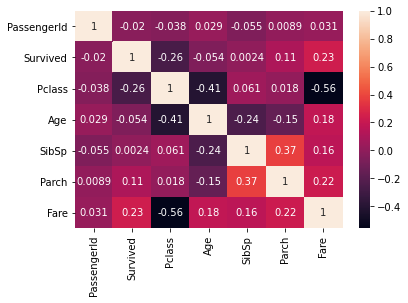

In [9]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Outlier Detection

### Outliers are extreme values that fall a long way outside of the other observations. The process of identifying outliers has many names in data mining and machine learning such as outlier mining, outlier modeling and novelty detection and anomaly detection.

# 3 ways to detect outliers -
Using Box Plot

 Using IQR (Inter quartile range)
 
 Using Z score 


# Using Boxplot

C:\Users\mandeep.singh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

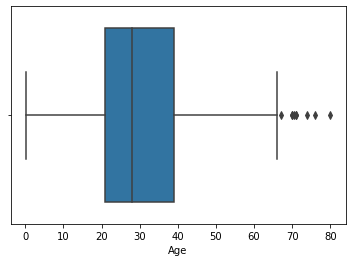

In [10]:
sns.boxplot(df['Age'])

In [11]:
print(np.where(df['Age']>66))

(array([  81,   96,  514,  534,  911, 1048, 1090, 1163, 1269], dtype=int64),)


In [12]:
print(df.iloc[[81]])

    PassengerId  Survived  Pclass                Name   Sex   Age  SibSp  \
81          973         0       1  Straus, Mr. Isidor  male  67.0      1   

    Parch    Ticket      Fare    Cabin Embarked  
81      0  PC 17483  221.7792  C55 C57        S  


In [13]:
print(df.iloc[[96]])

    PassengerId  Survived  Pclass  \
96          988         1       1   

                                                 Name     Sex   Age  SibSp  \
96  Cavendish, Mrs. Tyrell William (Julia Florence...  female  76.0      1   

    Parch Ticket   Fare Cabin Embarked  
96      0  19877  78.85   C46        S  


# Using IQR

In [14]:
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)
iqr = percentile75 - percentile25

In [15]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [16]:
upper_limit

66.0

In [17]:
lower_limit

-6.0

In [18]:
records_beyond_upper_limit = df['Age'] >= upper_limit

print(np.where(records_beyond_upper_limit))

(array([  81,   96,  451,  514,  534,  911, 1048, 1090, 1163, 1269],
      dtype=int64),)


In [19]:
records_below_lower_limit = df['Age'] <= lower_limit

print(np.where(records_below_lower_limit))

(array([], dtype=int64),)


#### Zscore = (data_point -mean) / std. deviation

It indicates how many standard deviation away a data point is from mean

# Using Z score

In [20]:
std=np.std(df['Age'])
std

14.406601748667827

In [21]:
mean = np.mean(df['Age'])
mean

29.881137667304014

In [22]:
z_score =[ (df.iloc[i, 5]-mean)/std for i in range(len(df)) ]




In [23]:
z_score

[0.3206073446934209,
 1.1882651184051063,
 2.2294544468591284,
 -0.1999873195335903,
 -0.5470504290182645,
 -1.1023514041937432,
 0.008250546157214175,
 -0.26939994143052515,
 -0.8247009166060038,
 -0.6164630509151993,
 nan,
 1.1188524965081714,
 -0.47763780712132964,
 2.2988670687560635,
 1.1882651184051063,
 -0.4082251852243948,
 0.3553136556418883,
 -0.6164630509151993,
 -0.1999873195335903,
 1.0494398746112366,
 1.743566093580585,
 -1.4494145136784173,
 nan,
 -0.6164630509151993,
 1.2576777403020412,
 1.396502984095911,
 -0.5470504290182645,
 -0.5123441180697971,
 0.7717893870234973,
 nan,
 1.396502984095911,
 -0.4082251852243948,
 0.21648841184801867,
 nan,
 0.008250546157214175,
 -0.7899946056575364,
 nan,
 -0.6164630509151993,
 -0.33881256332745996,
 nan,
 0.6329641432296277,
 nan,
 0.7717893870234973,
 0.008250546157214175,
 1.0494398746112366,
 -0.33881256332745996,
 1.0494398746112366,
 nan,
 2.090629203065259,
 0.42472627753882314,
 -0.4082251852243948,
 -0.1999873195335903,

In [24]:
 for item in z_score:
        if (item >= 3.0 or item <= -3.0):
         print(item)

3.201231153416216
3.4788816410039556
3.0624059096223464


# Feature Engineering

In [25]:
## Select the columns which are relevant ---> Feature selection


## Port of Embarkation
## C = Cherbourg, Q = Queenstown, S = Southampton

## SibSp  # of siblings / spouses aboard the Titanic

## Parch  # of parents / children aboard the Titanic

features = ['Survived','Pclass','Sex','Age','Fare']
df1 = df[features]
df1

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
...,...,...,...,...,...
1304,0,2,male,27.0,13.0000
1305,1,1,female,19.0,30.0000
1306,0,3,female,NaN,23.4500
1307,1,1,male,26.0,30.0000


# Treating missing values

In [26]:
# since we have substaintial number of age values are missing so we can drop all those rows, it might effect accuracy of model
# fill missing values with median of age


df1['Age'].fillna(df1['Age'].median(), inplace=True)

C:\Users\mandeep.singh\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        1
dtype: int64

In [28]:
np.where(df1['Fare'].isnull())


(array([152], dtype=int64),)

In [29]:
df1.iloc[[152]]

,Survived,Pclass,Sex,Age,Fare
152,0,3,male,60.5,NaN


In [30]:
# since this is only one record so we can drop it 
df1.dropna(axis=0,inplace=True)

<ipython-input-30-e98ee323b3ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(axis=0,inplace=True)


In [31]:
np.where(df1['Fare'].isnull())

(array([], dtype=int64),)

# Converting categorical column to numerical

In [32]:
sex_numerical=pd.get_dummies(df1['Sex'],drop_first=True)
sex_numerical

,male
0,1
1,0
2,1
3,1
4,0
...,...
1304,1
1305,0
1306,0
1307,1


In [33]:
df1 = pd.concat([df1,sex_numerical],axis=1)

In [34]:
df1

,Survived,Pclass,Sex,Age,Fare,male
0,0,3,male,34.5,7.8292,1
1,1,3,female,47.0,7.0000,0
2,0,2,male,62.0,9.6875,1
3,0,3,male,27.0,8.6625,1
4,1,3,female,22.0,12.2875,0
...,...,...,...,...,...,...
1304,0,2,male,27.0,13.0000,1
1305,1,1,female,19.0,30.0000,0
1306,0,3,female,28.0,23.4500,0
1307,1,1,male,26.0,30.0000,1


In [35]:
df1 = df1.drop('Sex',axis=1)


In [36]:
df1

,Survived,Pclass,Age,Fare,male
0,0,3,34.5,7.8292,1
1,1,3,47.0,7.0000,0
2,0,2,62.0,9.6875,1
3,0,3,27.0,8.6625,1
4,1,3,22.0,12.2875,0
...,...,...,...,...,...
1304,0,2,27.0,13.0000,1
1305,1,1,19.0,30.0000,0
1306,0,3,28.0,23.4500,0
1307,1,1,26.0,30.0000,1


# Treating Outliers For Age 

In [101]:
from scipy import stats
z = np.abs(stats.zscore(df1['Age']))
df1['age_zscore']=z

In [102]:
df1[(df1.age_zscore<= -3) | (df1.age_zscore >= 3)]

,Survived,Pclass,Age,Fare,male,age_zscore,Fare_zscore
81,0,1,67.0,14.4542,1,3.043658,0.399048


In [103]:
df1.Age = np.where(df1.age_zscore > 3, df1['Age'].median(), df1.Age)
df1[(df1.age_zscore<= -3) | (df1.age_zscore >= 3)]

,Survived,Pclass,Age,Fare,male,age_zscore,Fare_zscore
81,0,1,28.0,14.4542,1,3.043658,0.399048


# Treating Outliers For Fare 

In [104]:
from scipy import stats
z = np.abs(stats.zscore(df1['Fare']))
df1['Fare_zscore']=z

In [105]:
df1[(df1.Fare_zscore <= -3) | (df1.Fare_zscore >= 3)]

,Survived,Pclass,Age,Fare,male,age_zscore,Fare_zscore
239,1,1,48.0,106.4250,0,1.513558,3.915407
308,0,1,55.0,93.5000,1,2.077279,3.312345
390,0,1,23.0,93.5000,1,0.499731,3.312345
411,1,1,37.0,90.0000,0,0.627711,3.149040
414,1,1,39.0,108.9000,0,0.788774,4.030887
642,1,1,38.0,90.0000,1,0.708242,3.149040
663,0,1,44.0,90.0000,1,1.191432,3.149040
709,1,1,19.0,91.0792,0,0.821857,3.199394
724,1,1,28.0,110.8833,0,0.097073,4.123425
725,1,1,17.0,108.9000,0,0.982920,4.030887


In [106]:
df1.Fare = np.where(df1.Fare_zscore > 3, df1['Fare'].median(), df1.Fare)
df1[(df1.Fare_zscore<= -3) | (df1.Fare_zscore >= 3)]

,Survived,Pclass,Age,Fare,male,age_zscore,Fare_zscore
239,1,1,48.0,14.4542,0,1.513558,3.915407
308,0,1,55.0,14.4542,1,2.077279,3.312345
390,0,1,23.0,14.4542,1,0.499731,3.312345
411,1,1,37.0,14.4542,0,0.627711,3.149040
414,1,1,39.0,14.4542,0,0.788774,4.030887
642,1,1,38.0,14.4542,1,0.708242,3.149040
663,0,1,44.0,14.4542,1,1.191432,3.149040
709,1,1,19.0,14.4542,0,0.821857,3.199394
724,1,1,28.0,14.4542,0,0.097073,4.123425
725,1,1,17.0,14.4542,0,0.982920,4.030887


# Divide data into Independent features(X) and dependent feature (y)

In [71]:
y = df1['Survived']
y

0       0
1       1
2       0
3       0
4       1
       ..
1304    0
1305    1
1306    0
1307    1
1308    0
Name: Survived, Length: 1308, dtype: int64

In [72]:
independant_features = ['Pclass','Age','Fare','male']
X = df1[independant_features]
X

,Pclass,Age,Fare,male
0,3,34.5,7.8292,1
1,3,47.0,7.0000,0
2,2,62.0,9.6875,1
3,3,27.0,8.6625,1
4,3,22.0,12.2875,0
...,...,...,...,...
1304,2,27.0,13.0000,1
1305,1,19.0,30.0000,0
1306,3,28.0,23.4500,0
1307,1,26.0,30.0000,1


# Do the scaling to bring all independent variables on same scale so that 
# model can do better while predicting

In [73]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()


X[independant_features]= scale.fit_transform(X[independant_features])
X.head()

<ipython-input-73-80978811b64d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[independant_features]= scale.fit_transform(X[independant_features])
C:\Users\mandeep.singh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Pclass,Age,Fare,male
0,1.0,0.513691,0.047488,1.0
1,1.0,0.700733,0.042459,0.0
2,0.5,0.925183,0.058760,1.0
3,1.0,0.401466,0.052542,1.0
4,1.0,0.326650,0.074530,0.0


# Divide data into train set and test set

In [107]:
from sklearn.model_selection import train_test_split

In [109]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 100,stratify=y, test_size = 0.35)

# Creating Model

In [111]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Training Model

In [112]:
model.fit(x_train,y_train)

LogisticRegression()

# Predicting using test set

In [114]:
y_pred = model.predict(x_test)

# Checking the accracy score

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.851528384279476

# Predicting on train set and checking accuracy score 

In [116]:
y_train_pred = model.predict(x_train)

In [117]:
accuracy_score(y_train_pred,y_train)

0.8564705882352941